<img src="./imgs/1.jpg" width=500>

# Напомню Backprop

<img src="./imgs/2.png" width=500>

Для вычисления производную $\large \frac{\partial L}{\partial x}$ нам нужно:
1. Получить с предыдущего шага производную $\large \frac{\partial L}{\partial z}$
2. Вычислить $\large \frac{\partial z}{\partial x}$
3. Высислить $\large \frac{\partial L}{\partial x} = \frac{\partial L}{\partial z} \frac{\partial z}{\partial x}$

Далее обновляем веса по алгоритму SGD:
$$
\large
x = x - \lambda \frac{\partial L}{\partial x}
$$

# Разбор решения прошлого семинара

# Minibatch SGD

Классический SGD:
$$
\large
x = x - \lambda \frac{\partial L}{\partial x}
$$

Mini-batch SGD
$$
\large
x = x - \lambda \frac{1}{B} \sum_{i=1}^{B}\frac{\partial L_i}{\partial x}
$$

Мотивация:
- Векторизация и утилизация GPU
- Ускорение обучения
<img src="./imgs/3.gif" width=500>


# Продвинутые методы оптимизации

## SGD + Momentum

$$
\Large
\begin{align}
m &= \alpha m+ (1 - \alpha) \nabla_{\theta} L \\
\theta &= \theta - \lambda m
\end{align}
$$
<img src="./imgs/4.gif" width=500>



## RMSProp (Root Mean Square Propagation)

$$
\Large
\begin{align}
v &= \beta v +  (1-\beta)(\nabla_{\theta} L)^2 \\
\theta &= \theta - \lambda \frac{1}{\sqrt{v}} \nabla_{\theta} L
\end{align}
$$
<img src="./imgs/5.gif" width=500>

## Adam (Adaptive Moment Estimation) 

Adam = SGD + Momentum + RMSProp

$$
\Large
\begin{align}
m &= \alpha m+ (1 - \alpha) \nabla_{\theta} L \\
v &= \beta v +  (1-\beta)(\nabla_{\theta} L)^2 \\
\theta &= \theta - \lambda \frac{m}{\sqrt{v}} \nabla_{\theta} L
\end{align}
$$
<img src="./imgs/6.gif" width=500>

# Откуда пошли сверточные сети

# 1958 - Hubel and Wiesel

<img src="./imgs/7.jpg" width=500>

<img src="./imgs/9.png" width=500>

- **Simple cells**: точки или линии с определенной ориентацией 
- **Complex cells**: точки или линии с определенной ориентацией двигающиеся в определенном направлении
- **Hypercomplex cells**: точки или линии с определенной ориентацией и определенной длинны двигающиеся в определенном направлении 

## 1980 - Neocognitron (Fukushima)

<img src="./imgs/10.jpg" width=400>
<img src="./imgs/11.gif" width=400>


# 1998 LeNet-5 (LeCun et.al.)

<img src="./imgs/12.png" width=700>


# 2012 AlexNet

<img src="./imgs/14.png">
**ImageNet**
- 1000 классов
- 1.2М обучение, 100К тест

**AlexNet**:
<img src="./imgs/13.png">

**AlexNet + ImageNet**:
<img src="./imgs/15.png">


# Взрывной рост GPU
<img src="./imgs/16.jpg">


# Основные блоки нейронных сетей

<img src="./imgs/17.jpg">

# PyTorch Autograd

<img src="./imgs/24.png">

- data: $z = f(x)$
- creator: $f$
- grad: $\large \frac{\partial z}{\partial x}$

## Оптимизация произвольной функции

In [1]:
import torch
from torch.autograd import Variable


class MyReLU(torch.autograd.Function):

    def forward(self, input):
        """
        In the forward pass we receive a Tensor containing the input and return a
        Tensor containing the output. You can cache arbitrary Tensors for use in the
        backward pass using the save_for_backward method.
        """
        self.save_for_backward(input)
        return input.clamp(min=0)

    def backward(self, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        input, = self.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input < 0] = 0
        return grad_input

dtype = torch.FloatTensor
# dtype = torch.cuda.FloatTensor # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold input and outputs, and wrap them in Variables.
x = Variable(torch.randn(N, D_in).type(dtype), requires_grad=False)
y = Variable(torch.randn(N, D_out).type(dtype), requires_grad=False)

# Create random Tensors for weights, and wrap them in Variables.
w1 = Variable(torch.randn(D_in, H).type(dtype), requires_grad=True)
w2 = Variable(torch.randn(H, D_out).type(dtype), requires_grad=True)

learning_rate = 3e-6
for t in range(10):
    # Construct an instance of our MyReLU class to use in our network
    relu = MyReLU()

    # Forward pass: compute predicted y using operations on Variables; we compute
    # ReLU using our custom autograd operation.
    y_pred = relu(x.mm(w1)).mm(w2)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum()
    print(t, loss.data[0])

    # Use autograd to compute the backward pass.
    loss.backward()

    # Update weights using gradient descent
    w1.data -= learning_rate * w1.grad.data
    w2.data -= learning_rate * w2.grad.data

    # Manually zero the gradients after updating weights
    w1.grad.data.zero_()
    w2.grad.data.zero_()

0 33181690.0
1 370046656.0
2 661274880.0
3 129296856.0
4 13690653.0
5 14666867.0
6 5061717.5
7 922038.625
8 516623.21875
9 365252.65625


# PyTorch NN

In [2]:
import torch
from torch.autograd import Variable

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs, and wrap them in Variables.
x = Variable(torch.randn(N, D_in))
y = Variable(torch.randn(N, D_out), requires_grad=False)

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. Each Linear Module computes output from input using a
# linear function, and holds internal Variables for its weight and bias.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-4
for t in range(10):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Variable of input data to the Module and it produces
    # a Variable of output data.
    y_pred = model(x)

    # Compute and print loss. We pass Variables containing the predicted and true
    # values of y, and the loss function returns a Variable containing the
    # loss.
    loss = loss_fn(y_pred, y)
    print(t, loss.data[0])

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Variables with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Variable, so
    # we can access its data and gradients like we did before.
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

0 632.87890625
1 587.8260498046875
2 548.3325805664062
3 513.4364624023438
4 482.30792236328125
5 453.96063232421875
6 427.8995361328125
7 403.86968994140625
8 381.578857421875
9 360.7628479003906


## Optimizer

In [3]:
# -*- coding: utf-8 -*-
import torch
from torch.autograd import Variable

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs, and wrap them in Variables.
x = Variable(torch.randn(N, D_in))
y = Variable(torch.randn(N, D_out), requires_grad=False)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
loss_fn = torch.nn.MSELoss(size_average=False)

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use Adam; the optim package contains many other
# optimization algoriths. The first argument to the Adam constructor tells the
# optimizer which Variables it should update.
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(10):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    print(t, loss.data[0])

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable weights
    # of the model)
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()

0 723.9585571289062
1 706.3290405273438
2 689.1117553710938
3 672.46142578125
4 656.3787231445312
5 640.7792358398438
6 625.6439819335938
7 610.9398193359375
8 596.6175537109375
9 582.6902465820312


# Сверточный слой

<img src="./imgs/18.jpg">

<img src="./imgs/19.png">
Типичные размеры фильтров: 1х1, 3х3, 5х5,


Картинка = тензор размера (ширина, высота, число каналов)
<img src="./imgs/20.png" width=300>

1 слой состоит из нескольких филтров (filter bank)
<img src="./imgs/21.png" width=400>



Stride
<img src="./imgs/22.gif" width=300>

Padding
<img src="./imgs/23.gif" width=400>


## Свертка в PyTorch

```python
class torch.nn.Conv2d(
    in_channels,  # Число каналов на входе
    out_channels, # Число каналов на выходе
    kernel_size,  # Размер ядра свертки
    stride=1,     # Шаг свертки
    padding=0,    # Сколько прибавлять по краям
    dilation=1, groups=1, bias=True) # Параметры не интересные в нашем курсе
```

- Вход: $(N, C_{in}, H_{in}, W_{in})$
- Выход: $(N, C_{out}, H_{out}, W_{out})$
- Есть варинаты 1d (для звука, например) и 3d (для объемных томограмм например)


# Transposed convolution

<img src="./imgs/25.gif" width=400>
<img src="./imgs/28.png">


```python
class torch.nn.ConvTranspose2d
```

# Pooling

<img src="./imgs/26.jpg" width=400>
<img src="./imgs/27.jpg" width=400>


# Активация
```python
class torch.nn.Sigmoid
```
Чем плох сигмойд?
<img src="./imgs/29.png" >
<img src="./imgs/30.png" >

```python
class torch.nn.ReLU(inplace=False)
```
<img src="./imgs/31.png" >


```python
class torch.nn.Softmax
class torch.nn.Softmax2d
```
$$\large {Softmax}_j(x) = \frac{exp(x_j)}{\sum_i exp(x_i)}$$

# Dropout
<img src="./imgs/33.png" >
<img src="./imgs/34.png" >
<img src="./imgs/35.png" >

```python
class torch.nn.Dropout(
class torch.nn.Dropout2d(
    p=0.5,         # % фичей, которые нужно занулить
    inplace=False  # делать ли оптимизацию
```
   

# Batch Normalization

<img src="./imgs/36.png" >

Можно показать, что это происходит не только с входными данными, но и с выходами слоёв, даже если входные данные нормализованы (см [Andrej Karpathy cs231n](https://youtu.be/gYpoJMlgyXA?list=PLkt2uSq6rBVctENoVBg1TpCC7OQi31AlC&t=2221)).

Решение проблемы - нормализация данных внутри сети - Batch Normalization [Ioffe, Szegedy 2015](https://arxiv.org/pdf/1502.03167.pdf)

<img src="./imgs/37.png" width=400>

$$
y = \frac{x - mean[x]}{ \sqrt{Var[x] + \epsilon}} * gamma + beta
$$

<img src="./imgs/38.png" width=400>


```python
class torch.nn.BatchNorm2d(
    num_features,   # Число фильтров, которое следует ожидать на входе
    eps=1e-05,      # Epsilon из знаменателя
    momentum=0.1,   # Момент, с которым идет накопление среднего и дисперсии
    affine=True)    # учить gamma и beta
```



# Loss функции

```python
class torch.nn.MSELoss
class torch.nn.CrossEntropyLoss # Комбинация Cross Entropy и Softmax в одном слое
class torch.nn.NLLLoss # Оптимизация правдоподобия, на вход ожидает логарифмы вероятностей (выход LogSoftmax)
```


# Решаем MNIST
Решаем MNIST

In [4]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [5]:
# Загружаем MNIST
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home='./')
X = mnist['data']
# переходим к формату тензоров pytorch
X = X.reshape((-1, 1, 28, 28))
X = X.astype('float')
print(X.shape)

(70000, 1, 28, 28)


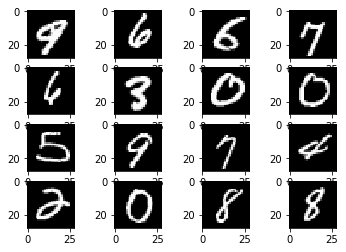

In [6]:
n=4
for i in range(n*n):
    plt.subplot(n,n,i+1)
    I = X[np.random.randint(0, X.shape[0]),0]
    plt.imshow(I, cmap='gray')

In [7]:
from sklearn.preprocessing import OneHotEncoder

Y = mnist['target'].astype('int')
print('original', Y)


original [0 0 0 ..., 9 9 9]


# TODO

In [8]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
from torch.autograd import Variable

class Net(nn.Module):

    # Слои, в которых нет параметров для обучения можно не создавать, а брать из переменной F
    def __init__(self):
        super(Net, self).__init__()
        
        self.bn1 = nn.BatchNorm2d(1)
        self.conv1to8 = nn.Conv2d(1,8,5)
        self.bn8 = nn.BatchNorm2d(8)
        self.conv8to16 = nn.Conv2d(8,16,5)
        self.bn16 = nn.BatchNorm2d(16)
        self.lin = nn.Linear(16 * 4 * 4, 10)
        
        # batchnorm
        # conv in 28x28x1, out 24x24x8
        # bn
        # relu
        # max pooling  # in 24x24, out 12x12
        # conv in 12x12x8, out 8x8x16
        # bn
        # relu
        # max pooling # in 8x8x16 out 4x4x16
        # flatten
        # linear
        # relu
        # log softmax

    def forward(self, x):
        # TODO
        x = self.bn1(x)
        x = self.conv1to8(x)
        x = self.bn8(x)
        x = F.relu(x)
        x = F.max_pool2d(x,2)
        x = self.conv8to16(x)
        x = self.bn16(x)
        x = F.relu(x)
        x = F.max_pool2d(x,2)
        x = x.view(-1, 16 * 4 * 4)
        x = self.lin(x)
        x = F.relu(x)
        x = F.log_softmax(x)
        return x
   
net = Net()
# print(net)

In [11]:
%%timeit -n 1 -r 1

loss_fn = torch.nn.NLLLoss()

learning_rate = 1e-4
batch_size = 10
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
loss_curve = []

for iter in range(3):
    Xperm = np.random.permutation(X.shape[0])
    loss_acc = 0
    for b in range(X.shape[0]//batch_size):
        batch_idxs = Xperm[b*batch_size:(b+1)*batch_size]
        x = Variable(torch.Tensor(X[batch_idxs]))
        y = Variable(torch.LongTensor(Y[batch_idxs]))
        
        # TODO Optimization
        y_hat = net.forward(x)
        print(y_hat,y)
        loss = loss_fn(y_hat, y)
        loss_acc += loss.data[0]
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print('Done epoch %s with loss %s' % (iter, loss_acc))
    loss_curve.append(loss_acc)
    
plt.plot(loss_curve)

Variable containing:
-3.1614 -3.9887 -3.9490 -2.2789 -3.9887 -1.2802 -0.8728 -3.9887 -2.7162 -3.9887
-2.5352 -3.1675 -3.1675 -3.1675 -2.5540 -2.1403 -3.1675 -2.9104 -0.7757 -3.1675
-2.5798 -3.0875 -1.8573 -3.0875 -1.1969 -2.9209 -1.8533 -2.6181 -3.0875 -3.0875
-0.2708 -4.2156 -3.1072 -4.2156 -3.6640 -3.7394 -2.8700 -3.5990 -4.2156 -4.2156
-2.8722 -2.8722 -2.8722 -2.1437 -1.1017 -1.8924 -2.8722 -2.8722 -2.8081 -2.8722
-4.5572 -4.5572 -3.5187 -4.5572 -2.7313 -3.3373 -0.2346 -4.5572 -3.6376 -4.5572
-0.1449 -4.9554 -3.9173 -4.5946 -4.9554 -3.4394 -3.2885 -4.9554 -4.9141 -4.9554
-4.7182 -4.7182 -4.7182 -0.2137 -4.7182 -2.2914 -4.7182 -4.7182 -3.5487 -4.7182
-4.0056 -4.0056 -2.9683 -0.3399 -4.0056 -2.4867 -4.0056 -4.0056 -3.1159 -4.0056
-0.2744 -4.1875 -3.1794 -4.1875 -3.6842 -3.6083 -3.0043 -3.3282 -4.1875 -4.1875
[torch.FloatTensor of size 10x10]
 Variable containing:
 5
 8
 9
 0
 9
 6
 0
 3
 3
 0
[torch.LongTensor of size 10]

Variable containing:
-0.0696 -5.6176 -5.1658 -5.6176 -5.6176 -

 Variable containing:
 2
 0
 1
 8
 1
 2
 7
 1
 5
 9
[torch.LongTensor of size 10]

Variable containing:
-4.5235 -4.7478 -0.1298 -4.2115 -3.6043 -4.7478 -3.6762 -4.7478 -4.7323 -4.7478
-3.4688 -1.7988 -3.5696 -3.8189 -4.0138 -2.8800 -3.9371 -4.0138 -0.4726 -4.0138
-3.6567 -4.8802 -4.8802 -4.8802 -3.8759 -4.3061 -4.8802 -0.1118 -4.8562 -4.8802
-4.2577 -4.2577 -2.6218 -0.4340 -4.2577 -2.8980 -4.2577 -4.2577 -1.9705 -4.2577
-3.1582 -3.1582 -3.1203 -3.1582 -0.7137 -2.8330 -1.8827 -3.1582 -3.1582 -3.1582
-2.8651 -2.8651 -2.8622 -2.7090 -0.8676 -2.5914 -2.8651 -2.5490 -2.5862 -2.8651
-3.1111 -3.6823 -3.6823 -1.5811 -3.6823 -1.2029 -3.0870 -3.6823 -1.2805 -3.6823
-4.5559 -3.4040 -3.1397 -4.5674 -4.0987 -3.9556 -0.1967 -4.5674 -3.7024 -4.5674
-1.7495 -2.9224 -2.9224 -2.9224 -2.9224 -1.7279 -2.1856 -2.8193 -1.5731 -2.9224
-5.3960 -5.4869 -5.3777 -5.4869 -3.8930 -3.8130 -0.0867 -5.4869 -4.2116 -5.4869
[torch.FloatTensor of size 10x10]
 Variable containing:
 2
 8
 7
 3
 4
 9
 8
 6
 8
 6
[torch.Lon

Variable containing:
-4.1190 -3.3631 -2.2832 -0.4400 -4.1190 -3.5939 -4.1190 -4.1190 -2.2018 -4.1190
-2.4893 -4.3745 -4.3745 -2.2484 -4.3745 -0.4077 -3.8316 -4.3745 -2.7868 -4.3745
-3.9233 -3.2259 -0.3951 -2.6348 -4.5464 -4.5464 -4.0231 -4.5464 -2.0035 -4.5464
-2.9708 -2.9708 -2.9708 -2.9708 -2.0965 -1.0609 -2.9708 -2.5905 -1.9078 -2.9708
-4.4372 -4.4372 -4.4372 -4.4372 -0.1301 -3.6627 -4.4372 -4.4372 -4.3010 -4.4372
-4.9907 -0.1235 -3.5420 -4.9907 -4.3915 -4.9907 -4.9465 -3.8839 -3.9147 -4.9907
-0.2021 -4.4450 -4.0323 -4.4450 -4.4450 -3.6145 -3.4296 -3.3097 -3.7981 -4.4450
-1.4581 -3.4620 -3.4620 -3.4620 -3.4620 -1.0807 -3.2667 -3.4620 -1.6014 -3.4620
-3.0263 -3.0263 -3.0263 -1.5582 -2.2370 -1.9227 -3.0263 -1.4043 -3.0263 -3.0263
-2.8172 -2.8172 -2.8172 -2.6412 -1.2027 -2.1026 -2.8172 -1.9137 -2.8172 -2.8172
[torch.FloatTensor of size 10x10]
 Variable containing:
 3
 5
 2
 9
 4
 1
 0
 5
 9
 9
[torch.LongTensor of size 10]

Variable containing:
-2.0153 -4.5375 -4.5375 -4.5375 -3.4632 -

Variable containing:
-2.8605 -1.5676 -2.9654 -2.3949 -3.3575 -2.2411 -1.6414 -3.3575 -1.6767 -3.3575
-3.4480 -4.1415 -1.7134 -4.1415 -0.7322 -4.1415 -1.5526 -4.1415 -4.1415 -4.1415
-3.1277 -3.1068 -3.1277 -1.7106 -1.6689 -2.1416 -3.1277 -1.4508 -2.8317 -3.1277
-3.5252 -3.5252 -3.1740 -1.4077 -3.5252 -1.9813 -3.5252 -3.1238 -0.9562 -3.5252
-4.1814 -4.1814 -0.6112 -1.4311 -4.1814 -4.1576 -2.5554 -4.1814 -3.0244 -4.1814
-4.8209 -5.4808 -4.5119 -5.1117 -5.4808 -5.4808 -5.4808 -0.0514 -5.4808 -5.4808
-3.0543 -3.0543 -3.0543 -2.6892 -0.7803 -1.9401 -3.0543 -3.0543 -3.0543 -3.0543
-3.0591 -3.0591 -3.0591 -3.0591 -2.1509 -1.8803 -3.0591 -1.0060 -2.4792 -3.0591
-2.3369 -1.6994 -2.9073 -3.2945 -2.6963 -2.3211 -1.3978 -3.2945 -1.9523 -3.2945
-5.6016 -6.0200 -5.7448 -6.2104 -6.2187 -6.2187 -6.2187 -0.0215 -6.2187 -6.2187
[torch.FloatTensor of size 10x10]
 Variable containing:
 8
 4
 4
 8
 3
 7
 4
 9
 6
 7
[torch.LongTensor of size 10]

Variable containing:
-1.9136 -3.4001 -0.8585 -2.9515 -3.4001 -

Variable containing:
-5.1284 -5.1284 -4.4786 -5.1284 -3.3824 -4.9275 -0.1164 -5.1284 -3.5855 -5.1284
-2.1421 -3.8595 -3.5503 -3.8595 -3.0449 -1.6275 -0.7577 -3.8595 -2.8678 -3.8595
-2.0365 -3.1093 -1.9473 -2.0422 -2.9946 -1.3698 -3.1093 -3.1093 -2.1682 -3.1093
-3.2197 -2.4561 -3.1249 -2.8150 -1.2435 -2.7546 -1.6281 -3.2197 -1.9506 -3.2197
-3.4376 -3.4376 -3.4376 -2.5277 -3.4376 -2.2911 -3.4376 -0.9056 -1.5058 -3.4376
-4.0641 -0.2105 -4.0641 -3.6123 -4.0390 -3.8687 -3.6908 -3.6395 -3.8372 -4.0641
-4.7101 -4.8562 -3.5292 -4.7967 -4.8562 -4.8562 -4.8562 -0.1208 -3.5659 -4.8562
-5.1875 -4.3992 -5.1875 -5.1875 -5.1875 -4.9202 -5.1875 -0.0775 -3.8422 -5.1875
-3.7357 -2.5021 -2.7313 -3.9642 -3.7603 -3.3660 -0.4335 -3.9642 -2.7161 -3.9642
-3.5598 -2.6927 -2.8044 -3.4274 -3.5598 -2.6936 -2.7742 -3.1079 -0.5461 -3.5598
[torch.FloatTensor of size 10x10]
 Variable containing:
 6
 8
 8
 4
 9
 1
 7
 7
 6
 8
[torch.LongTensor of size 10]

Variable containing:
-3.3291 -3.3291 -3.3291 -3.3291 -1.2018 -

Variable containing:
-3.0010 -3.0010 -3.0010 -3.0010 -0.9984 -2.0718 -2.4464 -3.0010 -2.1156 -3.0010
-3.4562 -3.4562 -3.4562 -0.5624 -3.4562 -2.0198 -3.4562 -2.8693 -2.9670 -3.4562
-2.9237 -3.8119 -3.8119 -0.8898 -3.8119 -1.1559 -3.8119 -3.4869 -2.5306 -3.8119
-4.3371 -4.3371 -4.3371 -0.1808 -4.2859 -2.8673 -4.3371 -4.3371 -4.1159 -4.3371
-3.0628 -4.1042 -2.9295 -4.1557 -3.5726 -4.0173 -0.2679 -4.1557 -3.6802 -4.1557
-3.0961 -3.9733 -3.9733 -2.6506 -3.9733 -0.4386 -3.9733 -3.8475 -2.0890 -3.9733
-3.9285 -3.9285 -3.9285 -3.9285 -0.2312 -3.8860 -3.9285 -3.2384 -3.5543 -3.9285
-2.8495 -2.8495 -2.8495 -1.9696 -1.9860 -1.7960 -2.8495 -1.5869 -2.7592 -2.8495
-3.4667 -4.2386 -4.2386 -2.6363 -4.2386 -0.2790 -4.2386 -4.2386 -2.9178 -4.2386
-3.0231 -3.8083 -2.1285 -3.8083 -2.6104 -3.7360 -0.5230 -3.8083 -2.9286 -3.8083
[torch.FloatTensor of size 10x10]
 Variable containing:
 9
 3
 3
 3
 6
 5
 4
 9
 5
 6
[torch.LongTensor of size 10]

Variable containing:
-3.2183 -3.2183 -3.2183 -3.0751 -2.4593 -

Variable containing:
-0.1877 -5.1264 -5.1264 -4.7154 -5.1264 -2.1939 -5.1264 -5.1264 -4.1927 -5.1264
-2.3566 -3.0653 -3.0653 -2.8904 -2.8383 -0.9460 -2.1866 -3.0653 -2.2628 -3.0653
-2.2243 -4.1226 -2.0965 -0.5770 -4.1226 -2.5136 -3.1435 -4.1226 -3.9917 -4.1226
-5.3885 -0.0646 -4.9159 -5.1171 -4.8346 -5.3885 -5.3885 -4.2354 -4.7641 -5.3885
-5.5969 -5.5969 -0.0582 -4.3082 -5.5969 -5.5969 -4.8283 -5.5969 -4.3588 -5.5969
-3.2981 -2.9643 -3.2981 -3.1181 -0.4457 -3.2981 -3.2981 -3.1682 -3.2981 -3.2981
-4.3303 -4.7684 -3.2148 -4.7684 -3.4856 -3.8269 -0.1777 -4.7684 -3.7685 -4.7684
-2.8954 -2.4828 -0.4881 -2.2196 -3.9768 -3.9768 -3.9768 -3.0995 -3.9768 -3.9768
-3.5897 -3.7606 -0.4764 -2.0745 -3.0196 -3.4654 -3.2929 -3.7606 -3.2510 -3.7606
-4.7284 -0.1860 -2.9383 -4.7284 -3.6088 -4.7284 -4.7284 -3.9272 -3.6581 -4.7284
[torch.FloatTensor of size 10x10]
 Variable containing:
 0
 5
 3
 1
 2
 4
 6
 2
 2
 1
[torch.LongTensor of size 10]

Variable containing:
-2.8268 -4.3408 -3.5359 -0.3918 -4.3408 -

Variable containing:
-4.7039 -0.1504 -3.4622 -4.7039 -4.4566 -4.7039 -4.6121 -3.5695 -3.8004 -4.7039
-0.0686 -5.6846 -4.8490 -5.6846 -5.6846 -4.5588 -3.7051 -5.6846 -5.0503 -5.6846
-4.4254 -4.4254 -4.4254 -4.4254 -0.1140 -4.4254 -4.4254 -4.4254 -4.4254 -4.4254
-5.0838 -5.0838 -4.4815 -0.1472 -5.0838 -3.7081 -5.0838 -5.0838 -2.7505 -5.0838
-2.7272 -3.9054 -3.9054 -3.9054 -0.3768 -3.9054 -2.5835 -2.9519 -3.9054 -3.9054
-2.2967 -4.2510 -0.3147 -3.7636 -4.2510 -4.2510 -3.6735 -3.7058 -3.2391 -4.2510
-3.0077 -3.2514 -1.3733 -2.1667 -3.2514 -1.3061 -3.2514 -3.2514 -2.1344 -3.2514
-4.5033 -2.8513 -3.0000 -3.4061 -4.5033 -4.5033 -4.5033 -0.2845 -2.9664 -4.5033
-3.5454 -2.4146 -1.7971 -2.9063 -2.9558 -2.7523 -1.1581 -3.5454 -1.7507 -3.5454
-2.6986 -4.8251 -3.1224 -4.8251 -4.4947 -3.9231 -0.2180 -4.8251 -3.8428 -4.8251
[torch.FloatTensor of size 10x10]
 Variable containing:
 1
 0
 4
 3
 4
 2
 2
 7
 6
 6
[torch.LongTensor of size 10]

Variable containing:
-3.7474 -2.8107 -2.9633 -3.4840 -4.0645 -

Variable containing:
-5.3187 -5.4777 -5.4777 -5.4777 -5.4670 -5.2430 -5.4777 -0.0413 -5.2692 -5.4777
-3.5814 -3.5814 -1.4363 -3.2926 -2.5526 -3.5814 -3.5814 -0.7456 -3.3952 -3.5814
-4.8998 -0.1519 -3.2693 -4.8998 -4.1914 -4.8998 -4.8998 -3.9981 -3.4377 -4.8998
-3.3012 -3.3012 -1.2020 -1.4384 -3.3012 -3.1073 -3.3012 -3.3012 -1.6278 -3.3012
-2.7403 -2.7403 -2.7403 -2.7403 -1.7548 -1.6905 -2.7403 -2.3303 -1.8449 -2.7403
-4.1805 -4.1805 -4.1805 -4.1805 -0.1586 -3.8516 -4.1805 -4.1805 -3.9959 -4.1805
-3.2724 -1.4179 -2.0137 -2.2770 -3.5931 -3.2044 -3.5931 -3.5931 -1.0991 -3.5931
-4.0837 -5.0478 -2.4497 -5.0478 -3.2865 -5.0478 -0.1973 -5.0478 -5.0478 -5.0478
-2.0781 -4.4166 -0.3562 -4.1302 -4.1479 -4.0879 -2.5567 -4.4166 -4.4166 -4.4166
-3.2395 -4.1567 -4.1567 -2.6653 -4.1567 -0.2960 -4.1567 -4.1567 -2.9279 -4.1567
[torch.FloatTensor of size 10x10]
 Variable containing:
 7
 7
 1
 3
 9
 4
 8
 6
 2
 5
[torch.LongTensor of size 10]

Variable containing:
-5.3216 -5.3216 -5.3216 -0.0801 -5.3216 -

KeyboardInterrupt: 

# Версия для GPU 

Done epoch 0 with loss 1054.567320883274
Done epoch 1 with loss 470.44910871982574
Done epoch 2 with loss 341.5352981686592
21 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


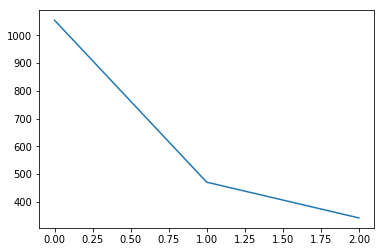

In [12]:
%%timeit -n 1 -r 1

net = Net().cuda()

loss_fn = torch.nn.NLLLoss().cuda()

learning_rate = 1e-4
batch_size = 100
loss_curve = []

optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

for iter in range(3):
    Xperm = np.random.permutation(X.shape[0])
    loss_acc = 0
    for b in range(X.shape[0]//batch_size):
        batch_idxs = Xperm[b*batch_size:(b+1)*batch_size]
        x = Variable(torch.Tensor(X[batch_idxs])).cuda()
        y = Variable(torch.LongTensor(Y[batch_idxs])).cuda()
        y_pred = net(x)
              
        loss = loss_fn(y_pred, y)
        loss_acc += loss.data[0]
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('Done epoch %s with loss %s' % (iter, loss_acc))
    loss_curve.append(loss_acc)
    
plt.plot(loss_curve)

# Augmentation

<img src="./imgs/32.png" >
<img src="./imgs/41.png" >


# Home Work 1

## CIFAR-10
<img src="./imgs/40.png" width=600 >

https://www.cs.toronto.edu/~kriz/cifar.html
- 32х32 цветные картинки
- 10 не пересекающихся классов
- 50к train + 10k test (сбалансированно по классам)


## Kaggle

https://www.kaggle.com/c/2017h2-mifi-bnn-hw1/host


# Почитать

- cs231n
  - https://www.youtube.com/watch?v=vT1JzLTH4G4&list=PLC1qU-LWwrF64f4QKQT-Vg5Wr4qEE1Zxk
  - Лекция 5, 6, 7
- http://pytorch.org/tutorials/index.html
- https://m2dsupsdlclass.github.io/lectures-labs/slides/03_conv_nets/index.html

<img src="./imgs/50.jpg" width=600 >
